In [123]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import torch
from sklearn import datasets
from matplotlib import pyplot as plt
boston = datasets.load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [124]:
data = boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [125]:
pd.DataFrame(data=data) #using pandas library it is easy to visualize the data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [126]:
target = boston.target
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [127]:
pd.DataFrame(data=target) #using pandas library it is easy to visualize the data

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [128]:
target=target.reshape(-1,1)
np.random.seed(5)
idx = np.random.permutation(data.shape[0]) 
trn_idx, tst_idx = idx[:450], idx[450:] 
D_train, D_test = data[trn_idx, :], data[tst_idx, :]
T_train, T_test = target[trn_idx, :], target[tst_idx, :]
print(D_train.shape, D_test.shape)
print(T_train.shape, T_test.shape)

(450, 13) (56, 13)
(450, 1) (56, 1)


In the immidiate above code block -

In line 1, target is 1D, so to calculate products, convert to 2D.

In line 4, as the prompt indicates, we take 450 datum as training data and rest as testing data.

In line 5, slicing 506 datum of the 'data' table into training and testing data.

In line 6, slicing 506 datum of the 'data' table into training and testing data.

## Problem 1

Explore some of the relationships between the features of the data. Which features appear to have the strongest relationship with the target? Which features have the weakest relationship? Use a few plots to describe the data and
these relationships.

In [129]:
print(np.corrcoef(data, target, rowvar=False)[:,13])

[-0.38830461  0.36044534 -0.48372516  0.17526018 -0.42732077  0.69535995
 -0.37695457  0.24992873 -0.38162623 -0.46853593 -0.50778669  0.33346082
 -0.73766273  1.        ]


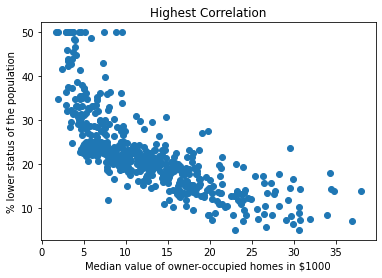

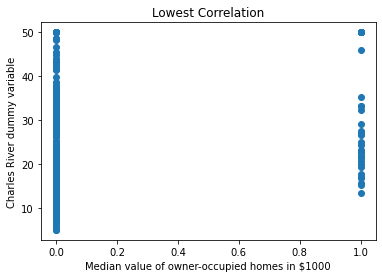

In [130]:
fig=plt.figure()
plt.subplot(1,1,1)
plt.plot(data[:,12],target,'o')
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.ylabel('% lower status of the population')
plt.title('Highest Correlation')
plt.show()
plt.subplot(1,1,1)
plt.plot(data[:,3],target,'o')
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.ylabel('Charles River dummy variable')
plt.title('Lowest Correlation')
plt.show()

Highest correlation -
Median value of homes with % lower status of the population is 0.73766273.
We can also visualize from the first graph that there is a strong correlation between the decrease in status of population as the median value of owner occupied homes increases.

Lowest correlation -
Median value of homes with Charles River dummy variable is 0.17526018.
We can also visualize from the second graph that there is almot no correlation between the dummy variable and the median value of owner occupied homes because as the name suggests, the values in the data are dummy.

In [131]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [132]:
def train(X_train, Y_train, epochs, p=None):
    in_size = X_train.shape[1]
    out_size = Y_train.shape[1]
    lr = 0.01
    model = linearRegression(in_size, out_size)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(Y_train).float()

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        if p:
            reg_term = torch.norm(model.linear.weight, p=p) 
        else:
            reg_term = 0
        loss += reg_term
        loss.backward()

        optimizer.step()

        if epoch % 50 == 0:
            print('epoch {}: loss = {}'.format(epoch, loss.item()))

    return model

In [133]:
def print_weights_biases(model):
    print(model.linear.weight.detach())
    print(model.linear.bias.detach())

In [134]:
def error_metrics(y_test, y_pred):
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    mape = np.mean(np.abs(y_pred - y_test) / y_test)
    mae = np.mean(np.abs(y_pred - y_test))
    mbe = np.mean(y_pred - y_test)
    r2 = np.corrcoef(y_pred.squeeze(), y_test.squeeze())[0, 1]**2
    return rmse, mape, mae, mbe, r2

In [135]:
def plot_results(T_measured, T_predicted, model):
    plt.figure()
    plt.plot(T_predicted, label='Predictions')
    plt.plot(T_measured, label='Measured')
    plt.legend()

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.plot(data[:, 0], target[:, 0], 'o')
    plt.plot(data[:, 0], model.linear.weight.detach()[0][0].numpy() * data[:, 0] + model.linear.bias.detach().numpy())

    plt.subplot(1, 3, 2)
    plt.plot(data[:, 1], target[:, 0], 'o')
    plt.plot(data[:, 1], model.linear.weight.detach()[0][1].numpy() * data[:, 1] + model.linear.bias.detach().numpy())

    plt.subplot(1, 3, 3)
    plt.plot(data[:, 2], target[:, 0], 'o')
    plt.plot(data[:, 2], model.linear.weight.detach()[0][2].numpy() * data[:, 2] + model.linear.bias.detach().numpy())

## Problem 2

Perform a multivariate linear regression on the Boston dataset without regularization. Report the coefficients of your trained model. Report the following testing error metrics: RMSE, MAPE, MAE, MBE, R2. Use plots to show how your model performs.

epoch 0: loss = 5040.33349609375
epoch 50: loss = 126.71498107910156
epoch 100: loss = 87.73804473876953
epoch 150: loss = 78.11136627197266
epoch 200: loss = 70.98715209960938
epoch 250: loss = 65.40592193603516
epoch 300: loss = 60.90428924560547
epoch 350: loss = 57.17833709716797
epoch 400: loss = 54.05305480957031
epoch 450: loss = 51.42043685913086
epoch 500: loss = 49.20085906982422
epoch 550: loss = 47.32648468017578
epoch 600: loss = 45.736637115478516
epoch 650: loss = 44.37764358520508
epoch 700: loss = 43.203651428222656
epoch 750: loss = 42.176822662353516
epoch 800: loss = 41.26680374145508
epoch 850: loss = 40.44985580444336
epoch 900: loss = 39.70757293701172
epoch 950: loss = 39.025840759277344
tensor([[-7.7299e-02,  8.4196e-02, -6.7725e-02,  3.5852e+00,  7.3911e-01,
          1.3439e+00,  1.0222e-01,  1.3757e-01,  6.0557e-02,  1.6879e-03,
          1.4380e-01,  2.8264e-02, -7.3341e-01]])
tensor([0.8314])
Regularization: None
RMSE: 6.058976887029903 
MAPE: 0.2272497699

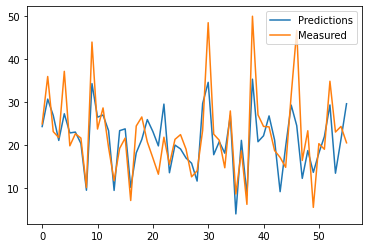

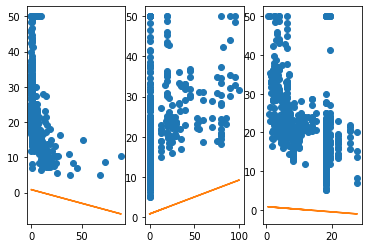

In [136]:
modelLR = train(X_train=D_train, Y_train=T_train, epochs=1000)
with torch.no_grad():
    T_predicted = modelLR(torch.from_numpy(D_test).float()).numpy()
print_weights_biases(modelLR)
rmse1, mape1, mae1, mbe1, r21 = error_metrics(T_test, T_predicted)

print('RMSE: {} \nMAPE: {} \nMAE: {} \nMBE: {} \nR2: {}'.format(rmse1, mape1, mae1, mbe1, r21))
plot_results(T_test, T_predicted, modelLR)

# Problem 3

Perform a linear regression on the Boston dataset with l2-norm regularization (i.e., ridge regression). Report the results as before.

epoch 0: loss = 2809.981201171875
epoch 50: loss = 94.11869812011719
epoch 100: loss = 70.4303970336914
epoch 150: loss = 60.346126556396484
epoch 200: loss = 54.72898864746094
epoch 250: loss = 51.600196838378906
epoch 300: loss = 49.60698318481445
epoch 350: loss = 48.122493743896484
epoch 400: loss = 46.907047271728516
epoch 450: loss = 45.868133544921875
epoch 500: loss = 44.95943069458008
epoch 550: loss = 44.150146484375
epoch 600: loss = 43.41755294799805
epoch 650: loss = 42.74494934082031
epoch 700: loss = 42.12030792236328
epoch 750: loss = 41.53511428833008
epoch 800: loss = 40.98326110839844
epoch 850: loss = 40.46027755737305
epoch 900: loss = 39.96279525756836
epoch 950: loss = 39.4881477355957
tensor([[-0.0770,  0.0853, -0.0346,  0.9383,  0.3722,  1.6471,  0.0963, -0.0117,
          0.0841, -0.0021,  0.2556,  0.0244, -0.7657]])
tensor([0.9931])
Regularization: L2-norm
RMSE: 5.769940530777516 
MAPE: 0.21445242829274203 
MAE: 4.37657778263092 
MBE: -1.0973158938544139 
R2:

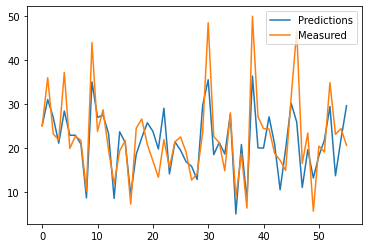

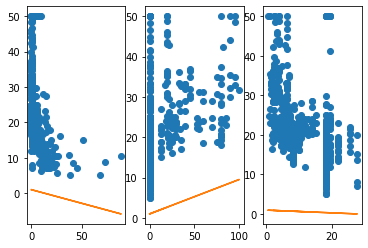

In [137]:
modelRR = train(X_train=D_train, Y_train=T_train, epochs=1000, p=2)  # p=2 means adding L2-norm regularization
with torch.no_grad():
    T_predicted = modelRR(torch.from_numpy(D_test).float()).numpy()
print_weights_biases(modelRR)
rmse2, mape2, mae2, mbe2, r22 = error_metrics(T_test, T_predicted)
print('Regularization: L2-norm')
print('RMSE: {} \nMAPE: {} \nMAE: {} \nMBE: {} \nR2: {}'.format(rmse2, mape2, mae2, mbe2, r22))
plot_results(T_test, T_predicted, modelRR)

# Problem 4

Perform a linear regression on the Boston datset with l1-norm regularization (i.e., lasso). Report the results as before. Compare the performances of the three models from Problems 2, 3, and 4 and comment on the results.

epoch 0: loss = 3368.776611328125
epoch 50: loss = 84.02603149414062
epoch 100: loss = 57.724334716796875
epoch 150: loss = 53.763648986816406
epoch 200: loss = 51.44459915161133
epoch 250: loss = 49.90164566040039
epoch 300: loss = 48.71851348876953
epoch 350: loss = 47.72319793701172
epoch 400: loss = 46.826419830322266
epoch 450: loss = 45.98887634277344
epoch 500: loss = 45.189239501953125
epoch 550: loss = 44.40782928466797
epoch 600: loss = 43.647735595703125
epoch 650: loss = 42.90581512451172
epoch 700: loss = 42.19596481323242
epoch 750: loss = 41.56584930419922
epoch 800: loss = 40.961021423339844
epoch 850: loss = 40.37567901611328
epoch 900: loss = 39.81052017211914
epoch 950: loss = 39.2623176574707
tensor([[-6.5090e-02,  7.8008e-02, -4.8940e-05,  1.8003e-04, -1.7980e-04,
          1.9430e+00,  8.3641e-02, -4.4647e-02,  8.7047e-02, -4.1414e-03,
          2.3445e-01,  2.1845e-02, -7.4838e-01]])
tensor([2.0099])
Regularization: L1-norm
RMSE: 5.529250158016503 
MAPE: 0.204838

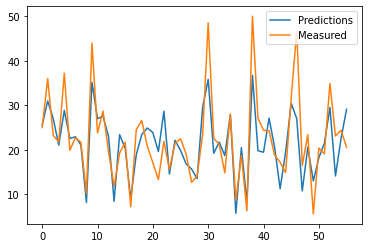

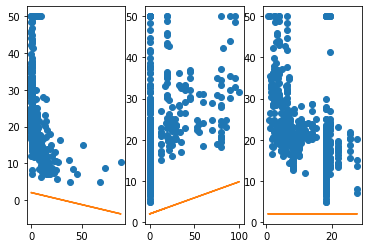

In [138]:
modelL = train(X_train=D_train, Y_train=T_train, epochs=1000, p=1)  # p=1 means adding L1-norm regularization
with torch.no_grad():
    T_predicted = modelL(torch.from_numpy(D_test).float()).numpy()
print_weights_biases(modelL)
rmse3, mape3, mae3, mbe3, r23 = error_metrics(T_test, T_predicted)
print('Regularization: L1-norm')
print('RMSE: {} \nMAPE: {} \nMAE: {} \nMBE: {} \nR2: {}'.format(rmse3, mape3, mae3, mbe3, r23))
plot_results(T_test, T_predicted, modelL)

# Problem 5

Perform a non-regularized linear regression on the Boston dataset using 5-fold cross validation. Report the results as before. Does the nonregularized model perform better with or without cross-validation? Does this agree with your expectations?

epoch 0: loss = 10028.2822265625
epoch 50: loss = 331.8531799316406
epoch 100: loss = 87.479248046875
epoch 150: loss = 65.76907348632812
epoch 200: loss = 60.4736442565918
epoch 250: loss = 57.1143913269043
epoch 300: loss = 54.15715408325195
epoch 350: loss = 51.541507720947266
epoch 400: loss = 49.25645446777344
epoch 450: loss = 47.27933883666992
epoch 500: loss = 45.581398010253906
epoch 550: loss = 44.1308708190918
epoch 600: loss = 42.89476013183594
epoch 650: loss = 41.84031677246094
epoch 700: loss = 40.93642044067383
epoch 750: loss = 40.15464782714844
epoch 800: loss = 39.47005081176758
epoch 850: loss = 38.86151123046875
epoch 900: loss = 38.31169128417969
epoch 950: loss = 37.80681610107422
Regularization: None
RMSE: 6.277772165280435 
MAPE: 0.2319426617918872 
MAE: 4.579382662679635 
MBE: -0.5215687639573041 
R2: 0.5119042860178503
epoch 0: loss = 3997.711669921875
epoch 50: loss = 130.01199340820312
epoch 100: loss = 71.25308227539062
epoch 150: loss = 58.36122512817383


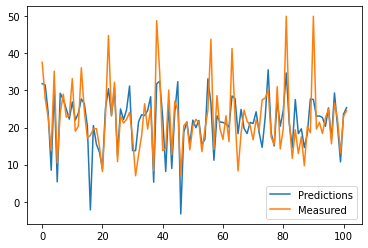

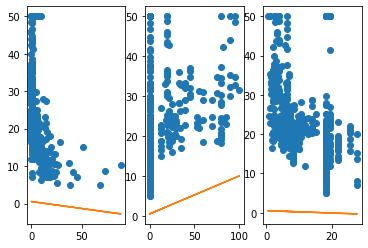

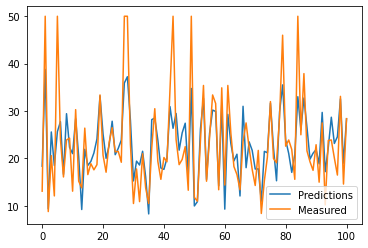

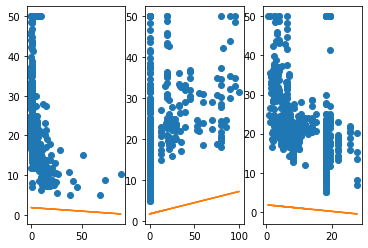

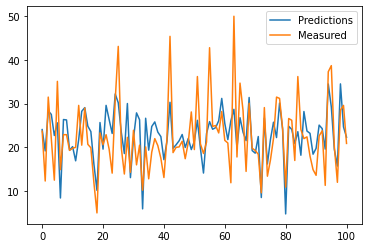

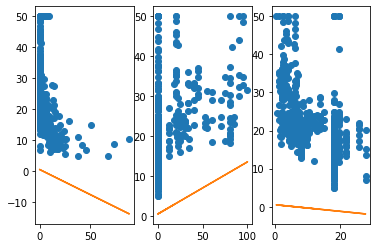

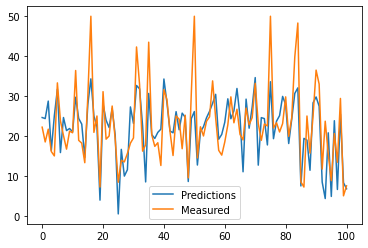

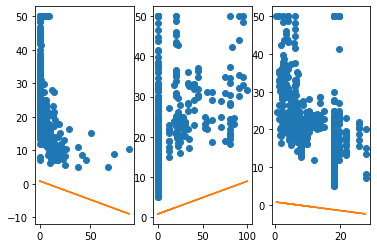

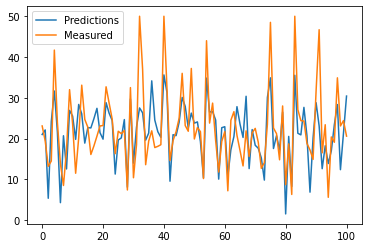

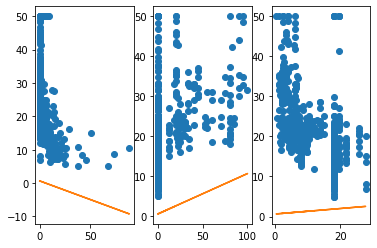

In [139]:
K = 5
splits = np.array_split(idx, K)  # Since, data cannot be split equally by 5, array_split is used to split the data
rmse_cv_noreg = np.zeros((K, 1))
mape_cv_noreg = np.zeros((K,1))
mae_cv_noreg = np.zeros((K,1))
mbe_cv_noreg = np.zeros((K,1))
r2_cv_noreg = np.zeros((K,1))

for k in range(K):
    tst_idx = splits[k]
    trn_idx = np.delete(idx, splits[k])
    D_train, D_test = data[trn_idx, :], data[tst_idx, :]
    T_train, T_test = target[trn_idx], target[tst_idx]
    model_LR = train(X_train=D_train, Y_train=T_train, epochs=1000)
    with torch.no_grad():
        T_predicted = model_LR(torch.from_numpy(D_test).float()).numpy()
    rmse1, mape1, mae1, mbe1, r21 = error_metrics(T_test, T_predicted)
    rmse_cv_noreg[k] = rmse1
    mape_cv_noreg[k] = mape1
    mae_cv_noreg[k] = mae1
    mbe_cv_noreg[k] = mbe1
    r2_cv_noreg[k] = r21
    print('Regularization: None')
    print('RMSE: {} \nMAPE: {} \nMAE: {} \nMBE: {} \nR2: {}'.format(rmse1, mape1, mae1, mbe1, r21))
    plot_results(T_test, T_predicted, model_LR)
    
print('Cross-validated RMSE with no regularization: ', rmse_cv_noreg.mean())
print('Cross-validated MAPE with no regularization: ', mape_cv_noreg.mean())
print('Cross-validated MAE with no regularization: ', mae_cv_noreg.mean())
print('Cross-validated MBE with no regularization: ', mbe_cv_noreg.mean())
print('Cross-validated R2 with no regularization: ', r2_cv_noreg.mean())